# CCT College Dublin

### Assessment Cover Page


Module Title: `Machine Learning for AI`

Assessment Title: `ML_CA2`

Lecturer Name: `David McQuaid`

Student Full Name: `Marcos Vinicius de Oliveira`

Student Number: `2023323`

Assessment Due Date: `13th May 2024`

Date of Submission: `31st May 2024`

# Neural Networks

## 1. Exploratory Data Analysis EDA

### 1.1 Importing Libraries

In [2]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns
# import tensorflow as tf

# from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# from sklearn.model_selection import train_test_split

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
# from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor

/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_211/36189988.py:15: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-05-27 16:57:59.636604: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-27 16:57:59.636828: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-27 16:57:59.639188: I external/local_tsl/

In [3]:
df = pd.read_csv("BankRecords.csv")
df.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


### 1.2 Renaming Columns

In [4]:
df = df.rename(
    {
        "Experience(Years)": "Experience",
        "Income(Thousands's)": "Income",
        "Sort Code": "SortCode",
        "Credit Score": "CreditScore",
        "Mortgage(Thousands's)": "Mortgage",
        "Personal Loan": "PersonalLoan",
        "Securities Account": "SecuritiesAccount",
        "CD Account": "CDAccount",
        "Online Banking": "OnlineBanking"
    }, axis=1)

df.head()

,ID,Age,Experience,Income,SortCode,Family,CreditScore,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,OnlineBanking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


### 1.3 Shape

In [5]:
df.shape

(5000, 14)

### 1.4 Describe

In [6]:
df.describe()

,ID,Age,Experience,Income,SortCode,Family,CreditScore,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


### 1.5 Encoding

In order to change the `Education`, `PersonalLoan`, `SecuritiesAccount`, `CDAccount`, `OnlineBanking` and `CreditCard`, I will be using Label Encoder in the binary and nominal columns

In [7]:
le = LabelEncoder()

df['Education'] = le.fit_transform(df['Education'])
df['PersonalLoan'] = le.fit_transform(df['PersonalLoan'])
df['SecuritiesAccount'] = le.fit_transform(df['SecuritiesAccount'])
df['CDAccount'] = le.fit_transform(df['CDAccount'])
df['OnlineBanking'] = le.fit_transform(df['OnlineBanking'])
df['CreditCard'] = le.fit_transform(df['CreditCard'])

df.head()

,ID,Age,Experience,Income,SortCode,Family,CreditScore,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,OnlineBanking,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,0,1


### 1.6 Heatmap

The reason I am using heatmap is beacuse I want to see which columns are co-related to `income`, eigher positive or nagative

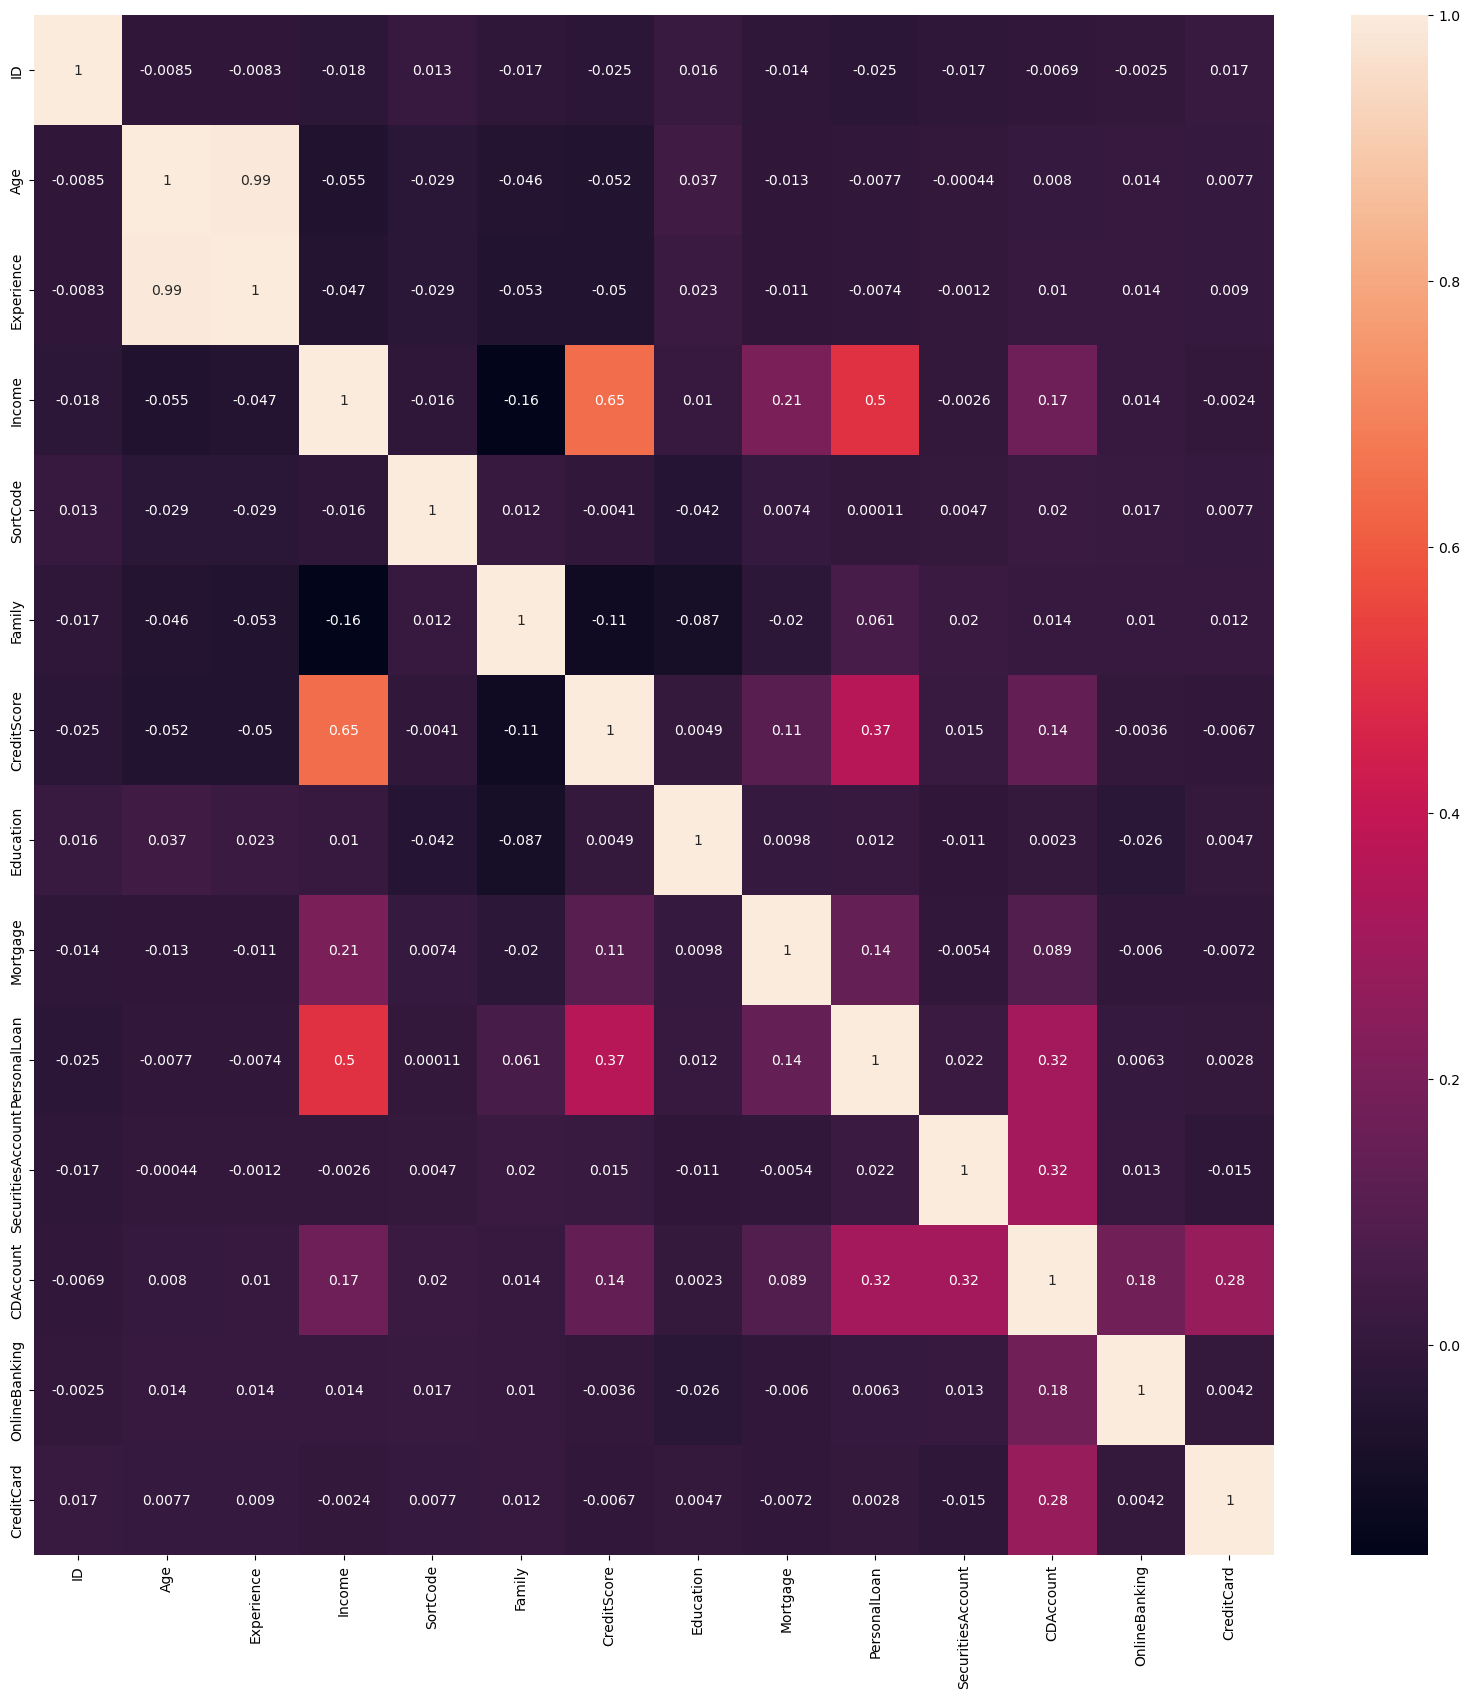

In [8]:
cm = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True)
plt.show()

- There is a strong positive correlation between `Income` and `CreditScore` , this indicates that higher income is associated with higher credit scores.

- There is a moderate positive correlation between `Income` and `PersonalLoan`, this suggests that individuals with higher incomes are more likely to have personal loans.

- There is also a weak positive correlation between `Income` and `Mortgage`, and this implies that higher income may be slightly associated with having a mortgage.

- And there is a weak positive correlation between `Income` and `CDAccount`, this also means that individuals with higher income are slightly more likely to have a CD account.

### 1.7 CreditScore Distributioins

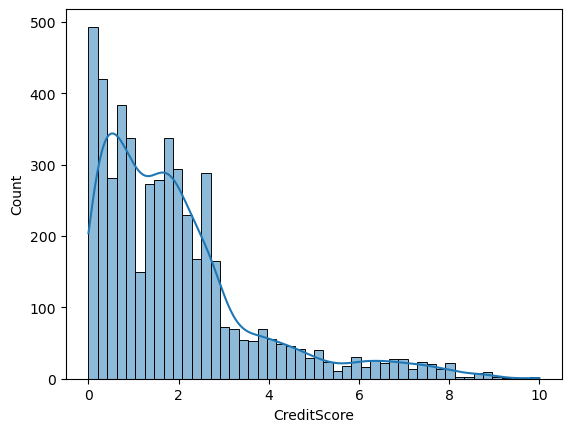

In [9]:
sns.histplot(df["CreditScore"], kde=True)
plt.show()

### 1.8 Personal Loan Distributioins

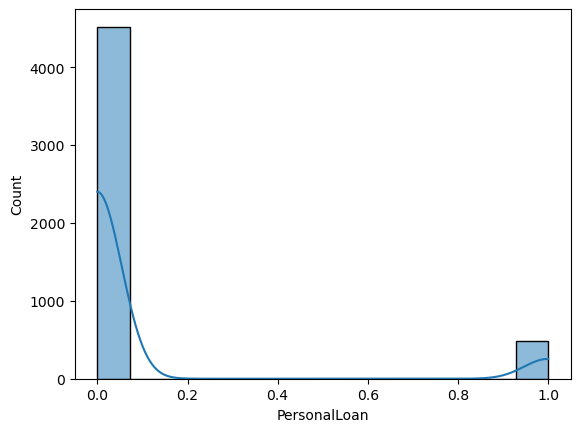

In [10]:
sns.histplot(df["PersonalLoan"], kde=True)
plt.show()

### 1.9 Mortgage Distributioins

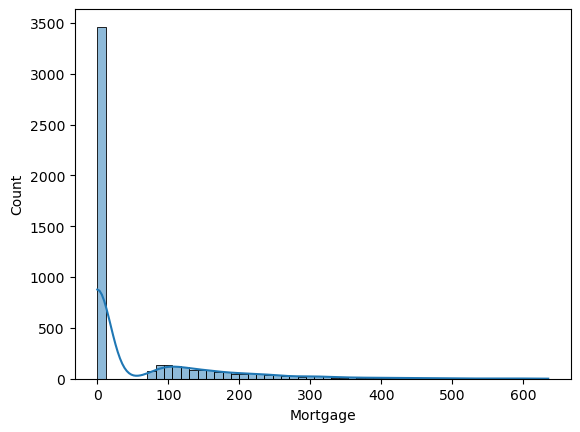

In [11]:
sns.histplot(df["Mortgage"], kde=True)
plt.show()

### 1.10 CDAccount Distributioins

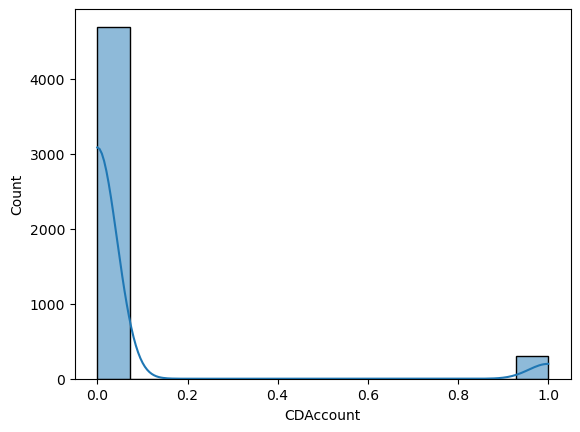

In [12]:
sns.histplot(df["CDAccount"], kde=True)
plt.show()

### 1.11 Income Distributioins

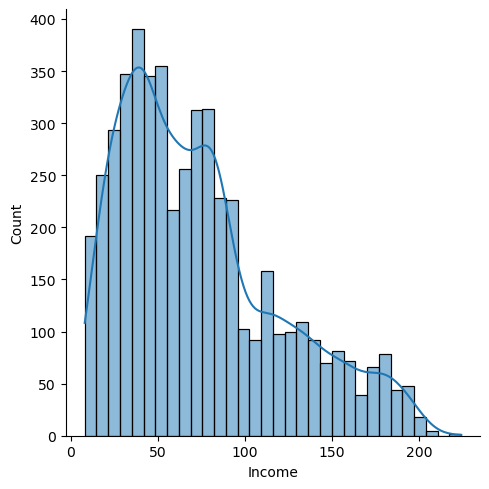

In [13]:
sns.displot(df["Income"], kde=True)
plt.show()

### 1.12 Dropping

As ID and SortCode are irrelevant to my analysis, I decided to drop them

In [14]:
df = df.drop(columns=["ID", "SortCode"])

df.head()

,Age,Experience,Income,Family,CreditScore,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,OnlineBanking,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,0
4,35,8,45,4,1.0,0,0,0,0,0,0,1


### 1.13 Outliers

I want to see the outliers in this dataset

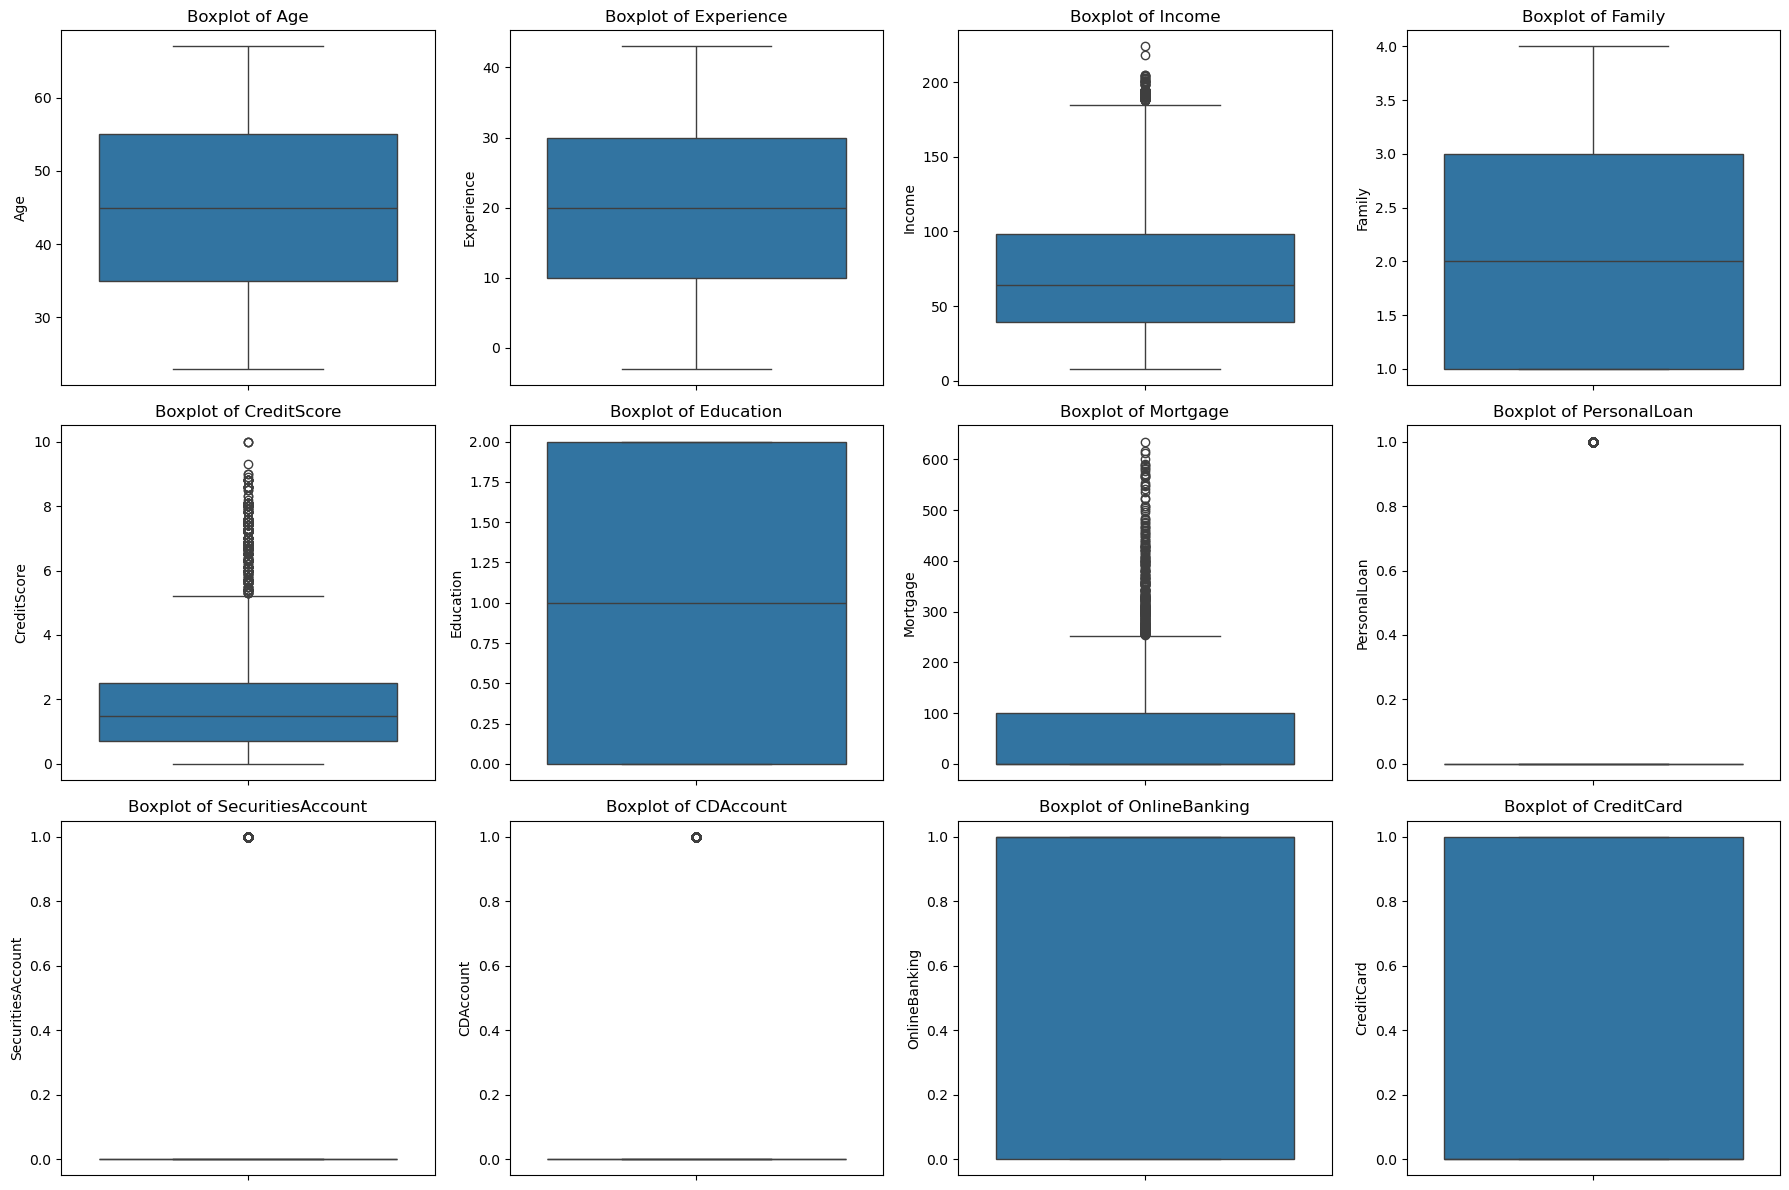

In [15]:
outliers_columns = ['Age', 'Experience', 'Income', 'Family', 'CreditScore', 'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount', 'CDAccount', 'OnlineBanking', 'CreditCard']

plt.figure(figsize=(18, 12))

for i, column in enumerate(outliers_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

The `income`, `credit score`, and `mortgage` columns have notable outliers which might affect this analysis

## 2. Scaling

Adding income to `y` and the remaining to `X`

In [16]:
y = df['Income']
X = df.drop('Income', axis=1)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [17]:
y_mapping = {index : label for index , label in enumerate(encoder.classes_)}

### 2.1 MinMaxScaler

The reason I am using `MinMaxScaler` is to make every value staying between 0 and 1, it will help the model do its predictions

In [18]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X) , columns = X.columns)

X

,Age,Experience,Family,CreditScore,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,OnlineBanking,CreditCard
0,0.045455,0.086957,1.000000,0.16,0.5,0.000000,0.0,1.0,0.0,0.0,0.0
1,0.500000,0.478261,0.666667,0.15,0.5,0.000000,0.0,1.0,0.0,0.0,0.0
2,0.363636,0.391304,0.000000,0.10,0.5,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.272727,0.260870,0.000000,0.27,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.272727,0.239130,1.000000,0.10,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,0.136364,0.130435,0.000000,0.19,1.0,0.000000,0.0,0.0,0.0,1.0,0.0
4996,0.159091,0.152174,1.000000,0.04,0.5,0.133858,0.0,0.0,0.0,1.0,0.0
4997,0.909091,0.913043,0.333333,0.03,1.0,0.000000,0.0,0.0,0.0,0.0,0.0
4998,0.954545,0.934783,0.666667,0.05,0.0,0.000000,0.0,0.0,0.0,1.0,0.0


## 3. Training (TensorFlow for Keras)

### 3.1 Splitting the data

In [19]:
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size = 0.80)

### 3.2 Defining and Building model

For binary classification, sigmoid is the best

In [20]:
inputs = tf.keras.Input(shape=(X.shape[1],))

x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

2024-05-27 16:59:53.773325: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-27 16:59:53.773847: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


### 3.3 Training the model

In [21]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='acc'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

batch_size = 32
epochs = 100

### 3.4 Fitting the model

Filtting the model with `training` sample

In [22]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.20,
    epochs=epochs,
    batch_size=batch_size
)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.0068 - auc: 0.6106 - loss: -39.3692 - val_acc: 0.0050 - val_auc: 0.4151 - val_loss: -286.8185
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - acc: 0.0063 - auc: 0.5262 - loss: -566.3560 - val_acc: 0.0050 - val_auc: 0.5000 - val_loss: -2238.4658
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - acc: 0.0058 - auc: 0.4851 - loss: -3254.3962 - val_acc: 0.0050 - val_auc: 0.5000 - val_loss: -8271.4385
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - acc: 0.0047 - auc: 0.4505 - loss: -10373.8525 - val_acc: 0.0050 - val_auc: 0.5000 - val_loss: -20304.4395
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - acc: 0.0055 - auc: 0.4653 - loss: -23648.4551 - val_acc: 0.0050 - val_auc: 0.5000 - val_loss: -39816.3477
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - acc: 0.0048 - auc: 0.4802 - loss: -44819.6719 - val_acc: 0.0050 - val_auc: 0.5000 - val_loss: -68317.2812
Epoch 7/100
100/100 ━━━━━━━━━━━━━━

### 3.5 Results fitting the training set

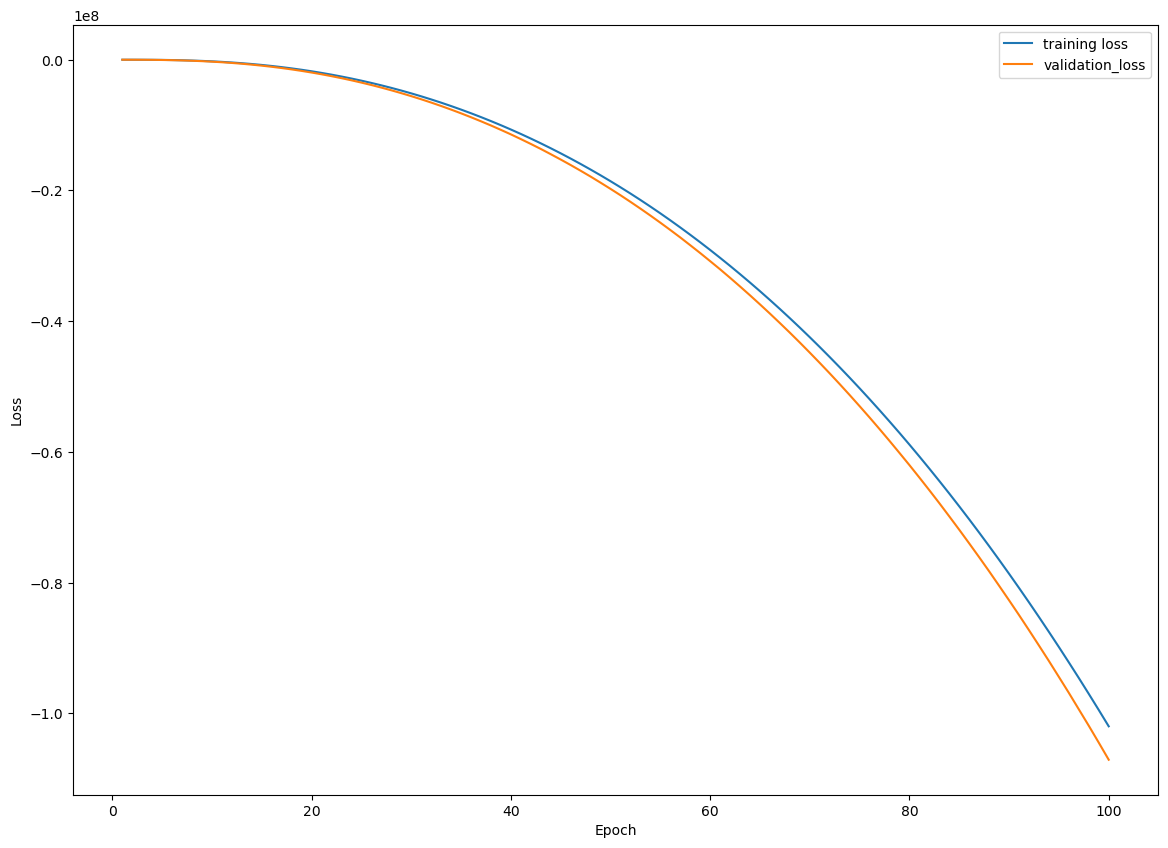

In [23]:
plt.figure(figsize = (14 , 10))

epochs_range = range(1 , epochs+1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range , train_loss , label = 'training loss')
plt.plot(epochs_range , val_loss , label ='validation_loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Observation: The training loss and validation loss are togheder, but at some point, the validation and the train loss are sligly different, it can happen becase the models starts overfiting...

## 4. Training (Keras for Regression)

Using the example `Keras for Regression` given in class on April 15th, I will apply the same concept and see if I can get a better result  

### 4.1 Input features and target variables

In [24]:
X = df.iloc[:,0:11]
y = df.iloc[:,11].values

In [25]:
sc = MinMaxScaler()
X = sc.fit_transform(X)
y = y.reshape(-1,1)
y = sc.fit_transform(y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=11, input_dim=11))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',
    metrics=['mae','accuracy'])
    return regressor

In [28]:
regressor = KerasRegressor(build_fn=build_regressor, batch_size=32, epochs=100)

In [29]:
results = regressor.fit(X_train,y_train)

Epoch 1/100


/home/mavinii/.var/app/org.jupyter.JupyterLab/config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/mavinii/.var/app/org.jupyter.JupyterLab/config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.4266 - loss: 1.1837 - mae: 0.8742
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.5703 - loss: 0.4391 - mae: 0.5383
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.6041 - loss: 0.3170 - mae: 0.4586
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.6370 - loss: 0.2620 - mae: 0.4229
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.6870 - loss: 0.2241 - mae: 0.3959
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.7258 - loss: 0.2081 - mae: 0.3859
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.7499 - loss: 0.1950 - mae: 0.3686
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.7352 - loss: 0.1981 - mae: 0.3798
Epoch 9/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.7366 - loss: 0.1975 - mae: 0.3780
Epoch 10/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.7370 - loss: 0.

In [30]:
y_pred = regressor.predict(X_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step


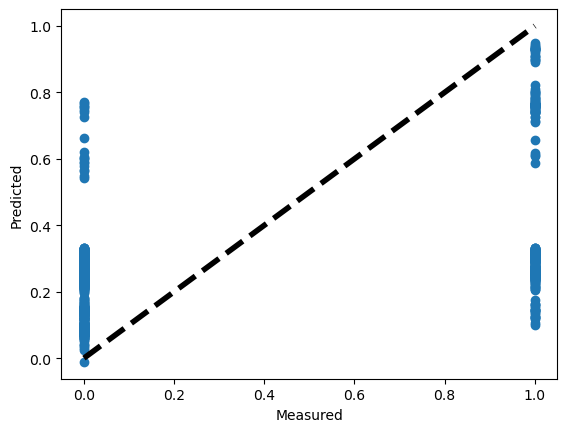

In [31]:
fig, ax = plt.subplots()

ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

plt.show()

### 3.6 Neural Networks Result

In [41]:
print(model.evaluate(X_test , y_test))

print(regressor.predict(X_test))

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - acc: 0.2720 - auc: 0.5000 - loss: 1378301.7500
[1341181.0, 0.28866666555404663, 0.5]
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step
[[0.32747093]
 [0.32119823]
 [0.26790655]
 ...
 [0.07991859]
 [0.3159764 ]
 [0.3266026 ]]


> Observation: The results of the `model` shows an `AUC of 0.4697`, which means that it is not so good but not that bad either, certanly it has rooms for improvement.

# Standard ML Regressor

## 1. GaussianNB

After testing other models, I decided to use GaussianNB because it is often used for binary classification, but it can also handle multiclass classification 

In [51]:
from sklearn.naive_bayes import GaussianNB

X_train , X_test , y_train , y_test = train_test_split(X , y , train_size = 0.2)

gb = GaussianNB()
gb.fit(X_train, y_train)

GaussianNB()

In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

### 1.1 Stardard ML Regressor Result

In [54]:
y_pred = gb.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred)*100)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00        21
           2       0.02      0.05      0.02        19
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00        26
           6       0.08      0.05      0.06        21
           7       0.00      0.00      0.00        30
           8       0.00      0.00      0.00        41
           9       0.00      0.00      0.00        42
          10       0.00      0.00      0.00        34
          11       0.12      0.02      0.03        51
          12       0.00      0.00      0.00        56
          13       0.00      0.00      0.00        47
          14       0.00      0.00      0.00        39
          15       0.50      0.02      0.04        55
          16       0.00      0.00      0.00        43
          17       0.00    

/home/mavinii/.var/app/org.jupyter.JupyterLab/config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mavinii/.var/app/org.jupyter.JupyterLab/config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mavinii/.var/app/org.jupyter.JupyterLab/config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 

> Results: For my analysis of this project, I can conclude that, the `AUC score of 0.4697 for the neural network` suggests that it did not perform well in distinguishing between classes. This could be due to various factors, for example, like of insufficient data (it does not appers to be it), inadequate preprocessing, or incorrect hyperparameter tuning and so on... as David mentioned on April 29th(if I am not wrong) that, to train a NN is very complex, it can takes weeks, months or even years.
>
> In the other hand, the high accuracy of `0.8500 with GaussianNB` suggests that the data might be well-suited to the assumptions made by the GaussianNB model, or that it captures the patterns in the data better given the current feature set and preprocessing.

# Semantic Analysis